In [50]:
from standardInclude import *

In [51]:
data_files = os.listdir("./data/")
#print(data_files)
dataframe_paths = []
for di in data_files:
    if("csv" in di):
        dataframe_paths.append("./data/"+di)# = ['./data/slidingNAsquare_eLow_1100_eHigh_2900_eWidth_100_nPeriods_12.csv']
print(dataframe_paths)

df_toSelect = 1

['./data/slidingNAsquare_eLow_1100_eHigh_2900_eWidth_100_nPeriods_12.csv', './data/slidingNAsquare_eLow_1100_eHigh_3200_eWidth_100_nPeriods_12.csv', './data/slidingNAsquare_eLow_1100_eHigh_3200_eWidth_100_nPeriods_24.csv', './data/slidingNAsquare_eLow_1100_eHigh_3200_eWidth_100_nPeriods_6.csv']


In [52]:
df = []
for dfname in dataframe_paths:
    dfi = pandas.read_csv(dfname,delimiter="|")
    df.append(dfi)

In [53]:
startTimes = list(df[df_toSelect]['0'])
df[df_toSelect].head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,30.19000,82.63000,"[5193.124609262164, 18010.20399384043, 40622.5...","[1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650....","[16.86240690949871, 31.822408700755744, 46.832...",1100,3200,100,12,0
1,1,31.23433,83.67433,"[5199.567850511024, 18024.588856279377, 40628....","[1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650....","[16.82850916852087, 31.497793537551598, 47.005...",1100,3200,100,12,1
2,2,32.27866,84.71866,"[5207.706737498454, 18028.242183855495, 40654....","[1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650....","[17.30126599752686, 31.70613850284119, 47.7354...",1100,3200,100,12,2
3,3,33.47218,85.91218,"[5194.663303564594, 18010.99107645221, 40624.3...","[1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650....","[17.181807436084792, 31.921356130783792, 47.98...",1100,3200,100,12,3
4,4,34.51651,86.95651,"[5185.309991327217, 17977.80129481161, 40565.7...","[1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650....","[17.686663174958927, 32.38665983273871, 48.449...",1100,3200,100,12,0


In [54]:
NAsquare_byTime = []
for i, row in df[df_toSelect].iterrows():
    NAsquare_byTime.append((row[1],row[2], stringToListOfFloats(row[3]), 
                            stringToListOfFloats(row[4]), stringToListOfFloats(row[5])))

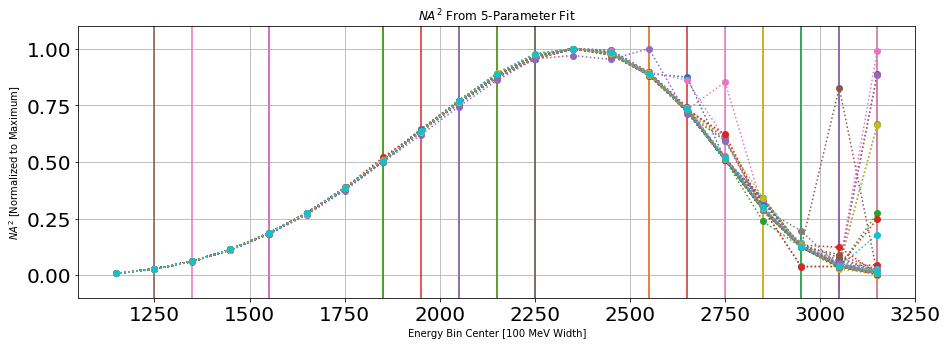

In [55]:
fig,ax = plt.subplots(figsize=(15,5))

for (t1, t2, ding,dong,error) in NAsquare_byTime:
    plt.errorbar(dong, [x/max(ding) for x in ding], yerr=[x/max(ding) for x in error],fmt="o:",
                label=str(round(t1,2))+"-"+str(round(t2,2))+r" $\mu s$")
    mean = np.sum( [x*y/np.sum(ding) for (x,y) in zip(ding,dong)] )
    #plt.plot([mean,mean],[0,1.1])
    #print(mean)

plt.title(r"$NA^{2}$ From 5-Parameter Fit")
plt.xlabel("Energy Bin Center [100 MeV Width]")
plt.ylabel(r"$NA^{2}$ [Normalized to Maximum]")
plt.grid()
#plt.legend(ncol=2)
plt.ylim(-0.1,1.1)
plt.show()

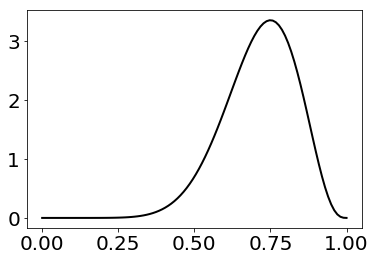

In [56]:
import scipy.stats
a = 10.0
b = 4

x = np.linspace(0,1,100)

rv = scipy.stats.beta(a, b)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [57]:
def betaFit(x,p):
    energy = x[0]/3200
    return p[2]*scipy.stats.beta(p[0], p[1]).pdf( energy )

f2 = r.TF1("f2",betaFit,1750,3000,3)
f2.SetParameters(10.,4.,2)

In [58]:
fitResults = []
meanResults = []
stdResults = []

for (t1, t2, ding,dong,error) in NAsquare_byTime:

    mean = np.sum( [x*y/np.sum(ding) for (x,y) in zip(ding,dong)] )
    variance = np.average((dong-mean)**2, weights=ding)
    stdev =  math.sqrt(variance)
    #f = r.TF1("func","gaus",2100,2800,3)
    fit = fitVector(dong, [x/max(ding) for x in ding], f2, [0 for i in range(len(ding))], error, "RQ")
    fitResults.append(fit[1])
    fit_smooth = TF1toVector(fit[4], 1050, 3250, 100)
    meanResults.append(mean)
    stdResults.append(stdev)
    
    if(False):
        fig,ax = plt.subplots(figsize=(15,5))
        plt.errorbar(dong, [x/max(ding) for x in ding], yerr=[x/max(ding) for x in error],fmt="o:",
                    label=str(round(t1,2))+"-"+str(round(t2,2))+r" $\mu s$")
        plt.plot(fit_smooth[0], fit_smooth[1],
                label=labelFit(fit[1][0], fit[1][1], None, fit[2]) )
        plt.title(r"$NA^{2}$ From 5-Parameter Fit")
        plt.xlabel("Energy Bin Center [60 MeV Width]")
        plt.ylabel(r"$NA^{2}$ [Normalized to Maximum]")
        plt.grid()
        plt.legend(ncol=1)
        plt.ylim(-0.1,1.1)
        plt.show()
        break

In [59]:
len(NAsquare_byTime)

200

In [60]:
allPars = [y for y in zip(*[x for x in zip(*fitResults)][0])]
allParErrs = [y for y in zip(*[x for x in zip(*fitResults)][1])]

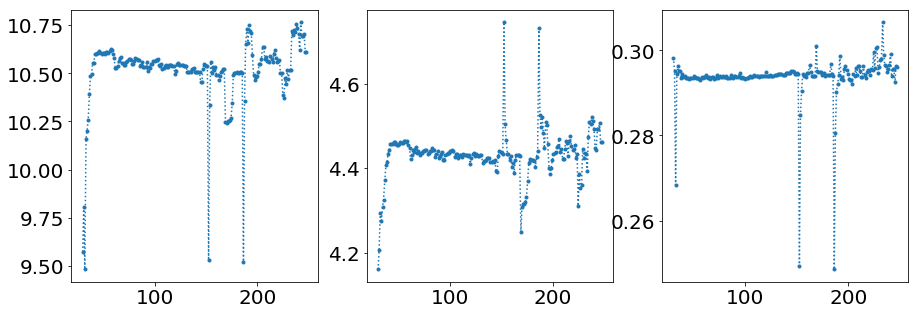

In [61]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
allParsWithUncertainties = []
for i in range(3):
    axi = ax[i]
    #axi.errorbar(startTimes, allPars[i], yerr=allParErrs[i])
    axi.plot(startTimes, allPars[i],":.")
    allParsWithUncertainties.append( [uncertainties.ufloat(x,y) for (x,y) in zip(allPars[i], allParErrs[i])] )
plt.show()

In [62]:
fitResults[1]

([9.804296328753429, 4.207534084851769, 0.29516211361409644],
 [1661.698129432882, 574.6413955656218, 23.902399313321737])

In [63]:
allParsWithUncertainties[0][0]

9.572956572126625+/-1546.2035929259143

In [64]:
allBetaMeans = []
allBetaMeanErrs = []
allBetaVars = []
for i, x in enumerate(fitResults):
    mean, var, skew, kurt = scipy.stats.beta.stats(x[0][0],x[0][1], moments='mvsk')
    #allBetaMeans.append(mean.mean())
    allBetaMeans.append(x[0][0]/(x[0][0]+x[0][1])) #calculation from https://mathworld.wolfram.com/BetaDistribution.html
    meanErr = allParsWithUncertainties[0][i]/(allParsWithUncertainties[1][i] + allParsWithUncertainties[0][i])
    #print(meanErr)
    allBetaMeanErrs.append( meanErr.s ) 
    allBetaVars.append(var.mean())

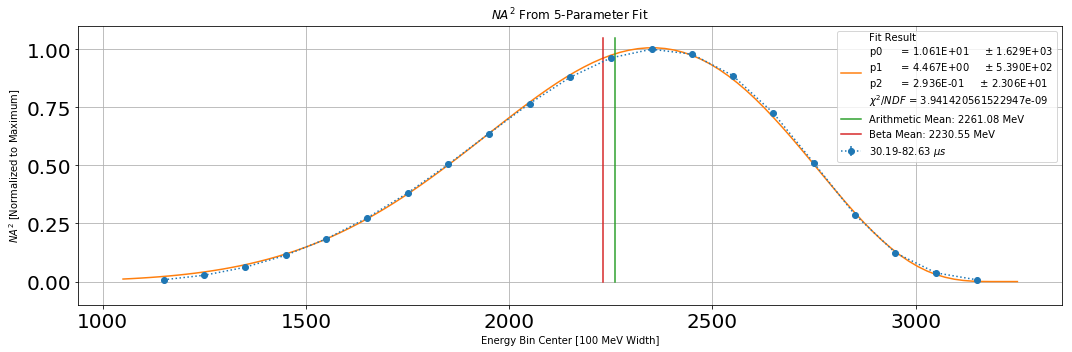

In [65]:
for i, (t1, t2, ding,dong,error) in enumerate(NAsquare_byTime):
    #if(i < 1):
    #    continue
    fig,ax = plt.subplots(figsize=(15,5))
    plt.errorbar(dong, [x/max(ding) for x in ding], yerr=[x/max(ding) for x in error],fmt="o:",
                label=str(round(t1,2))+"-"+str(round(t2,2))+r" $\mu s$")
    fit = fitVector(dong, [x/max(ding) for x in ding], f2, [0 for i in range(len(ding))], error, "RQ")
    fit_smooth = TF1toVector(fit[4], 1050, 3250, 100)
    plt.plot(fit_smooth[0], fit_smooth[1],label=labelFit(fit[1][0], fit[1][1], None, fit[2]) )
    plt.plot([meanResults[i], meanResults[i]],[0.0001,1.05],label="Arithmetic Mean: "+str(round(meanResults[i],2))+" MeV")
    plt.plot([allBetaMeans[i]*3200, allBetaMeans[i]*3200],[0.0001,1.05],label="Beta Mean: "+str(round(allBetaMeans[i]*3200,2))+" MeV")
    plt.title(r"$NA^{2}$ From 5-Parameter Fit")
    plt.xlabel("Energy Bin Center [100 MeV Width]")
    plt.ylabel(r"$NA^{2}$ [Normalized to Maximum]")
    plt.grid()
    plt.legend(ncol=1)
    plt.ylim(-0.1,1.1)
    plt.tight_layout()
    #plt.savefig("./images/NAsquare_beta_fit_"+str(i).zfill(4)+".png")
    plt.show()
    break

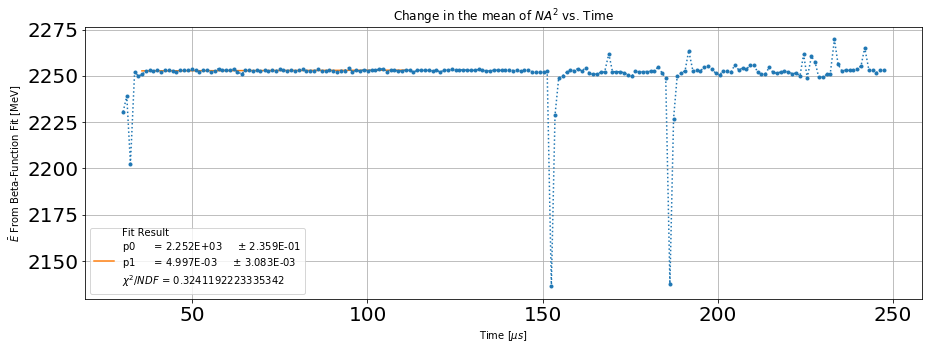

In [66]:
fig, ax = plt.subplots(figsize=(15,5))
yvals = [x*3200 for x in allBetaMeans]
xvals = startTimes
yerrvals = [x*3200 for x in allBetaMeanErrs]
plt.errorbar(xvals,yvals,
             #yerr=yerrvals,
             fmt=".:")

func = r.TF1("func","pol1",10,1000,2)
func.SetParameters(1,1)
fitrange = [5, 75]
fitresult = fitVector( xvals[fitrange[0]:fitrange[1]], yvals[fitrange[0]:fitrange[1]], func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi['calo_y']))], 
                        yerr=yerrvals[fitrange[0]:fitrange[1]],
                        #yerr=dfi['tracker_y_err'] 
                     )
plt.plot(xvals[fitrange[0]:fitrange[1]], fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
plt.legend()
#plt.ylim(2248,2252)

plt.title(r"Change in the mean of $NA^{2}$ vs. Time")
plt.ylabel(r"$\bar{E}$ From Beta-Function Fit [MeV]")
plt.xlabel(r"Time [$\mu s$]")

plt.grid()

plt.show()

In [67]:
1/2249.

0.00044464206313917296

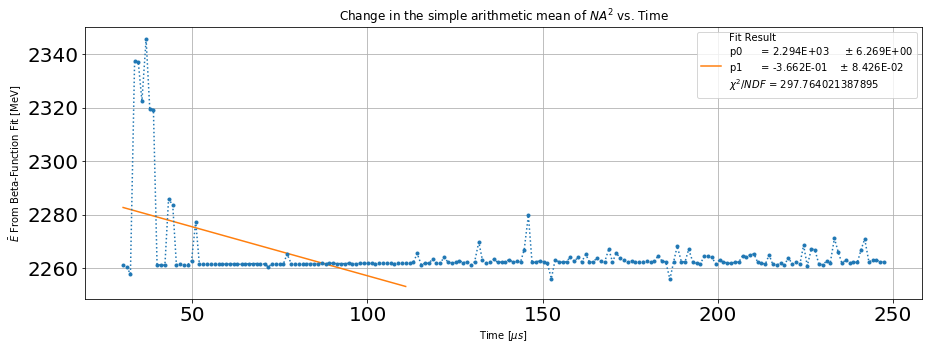

In [68]:
fig, ax = plt.subplots(figsize=(15,5))
yvals = meanResults
xvals = startTimes
yerrvals = [0 for x in allBetaMeanErrs]
#yerrvals = stdResults
plt.errorbar(xvals,yvals,
             #yerr=yerrvals,
             fmt=".:")

func = r.TF1("func","pol1",10,1000,2)
func.SetParameters(1,1)
fitrange = [0, 75]
fitresult = fitVector( xvals[fitrange[0]:fitrange[1]], yvals[fitrange[0]:fitrange[1]], func,
                        #xerr=dfi['calo_y_err'], 
                        xerr=[0 for i in range(fitrange[1] - fitrange[0])], 
                        yerr=yerrvals[fitrange[0]:fitrange[1]],
                        #yerr=dfi['tracker_y_err'] 
                     )
plt.plot(xvals[fitrange[0]:fitrange[1]], fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
plt.legend()

#plt.ylim(2253,2259)
#plt.xlim(20,360)

plt.title(r"Change in the simple arithmetic mean of $NA^{2}$ vs. Time")
plt.ylabel(r"$\bar{E}$ From Beta-Function Fit [MeV]")
plt.xlabel(r"Time [$\mu s$]")

plt.grid()

plt.show()

In [69]:
df = pandas.DataFrame()
df['time'] = startTimes
df['period'] = placeInPeriod
df['mean'] = meanResults
df['beta_mean'] = [x*3200 for x in allBetaMeans]
df['beta_mean_err'] = [x*3200 for x in allBetaMeanErrs]
df.head()

NameError: name 'placeInPeriod' is not defined

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(15,7), sharex=True, sharey=True)
tLow = 32
tHigh = 200
ax = flatten2dArray(axs)

allSlopes = []

for i in range(4):
    
    dfi = df.loc[df['period'] == i].loc[df['time'] >= tLow].loc[df['time'] <= tHigh]
    
    xvals = dfi['time']
    yvals=dfi['mean']
    
    axi = ax[i]
    axi.plot(xvals, yvals,".",label=str(i)+"/4 period past zero crossing ")
    axi.set_title("Place in g-2 Period: "+str(i))
    axi.set_xlabel(r"Time [$\mu s$]")
    axi.set_ylabel(r"Energy [MeV]")
    axi.grid()
    
    fitresult = fitVector( xvals, yvals, func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(fitrange[1] - fitrange[0])], 
                        #yerr=yerrvals[fitrange[0]:fitrange[1]],
                        #yerr=dfi['tracker_y_err'] 
                     )
    axi.plot(xvals, fitresult[0],
            label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
    allSlopes.append(fitresult[1])
    axi.legend(loc=2)
    
plt.tight_layout()
plt.show()

In [ ]:
allSlopes